

# Ejercicio Regression Tree
Son datos de temperaturas tomados de la ciudad de Seattle. El objetivo es intentar predecir lo mejor posible la máxima temperatura (columna `actual`) que alcanzaremos al día siguiente. Para ello contaremos con temperaturas de los dos días anteriores, históricos de máximas temperaturas y un amigo bastante chapas que te da su predicción del tiempo cada día.

**Resumen de datos**:
* year: 2016 for all data points
* month: number for month of the year
* day: number for day of the year
* week: day of the week as a character string
* temp_2: max temperature 2 days prior
* temp_1: max temperature 1 day prior
* average: historical average max temperature
* actual: max temperature measurement
* friend: your friend’s prediction, a random number between 20 below the average and 20 above the average


### 1. Importa el csv "temps.csv"

In [103]:
import numpy as np  
import pandas as pd 

In [104]:
df = pd.read_csv('/Users/miguelopez/Desktop/Machine Learning/1-Supervised/3-RegorClass/5-Decision_Trees/ejercicio/data/temps.csv')


In [105]:
df.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


In [106]:
df.tail()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
343,2016,12,27,Tues,42,42,45.2,47,41,50,47,47
344,2016,12,28,Wed,42,47,45.3,48,41,49,44,58
345,2016,12,29,Thurs,47,48,45.3,48,43,50,45,65
346,2016,12,30,Fri,48,48,45.4,57,44,46,44,42
347,2016,12,31,Sat,48,57,45.5,40,42,48,47,57


In [107]:
df.describe()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,57.238506,62.373563,59.772989,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,10.605746,10.549381,10.705256,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,41.000000,46.000000,44.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,48.000000,53.000000,50.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,56.000000,61.000000,58.000000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,66.000000,72.000000,69.000000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,77.000000,82.000000,79.000000,95.000000


In [108]:
df.shape

(348, 12)

In [109]:
df.isnull().sum()   

year              0
month             0
day               0
week              0
temp_2            0
temp_1            0
average           0
actual            0
forecast_noaa     0
forecast_acc      0
forecast_under    0
friend            0
dtype: int64

### 2. Lidia con las variables categóricas del dataset

In [110]:
# One-hot encode, get dummy variables (Week) 
df = pd.get_dummies(df)


In [111]:
df.head()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45.6,45,43,50,44,29,1,0,0,0,0,0,0
1,2016,1,2,44,45,45.7,44,41,50,44,61,0,0,1,0,0,0,0
2,2016,1,3,45,44,45.8,41,43,46,47,56,0,0,0,1,0,0,0
3,2016,1,4,44,41,45.9,40,44,48,46,53,0,1,0,0,0,0,0
4,2016,1,5,41,40,46.0,44,46,46,46,41,0,0,0,0,0,1,0


In [112]:
#  new df shape post encoding 

df.shape

(348, 18)

### 3. Divide en train y test

In [113]:
'''
Labels are extracted as numpy array from df['actual'] column.
Features are extracted by dropping ['actual'] column and converting the
rest of the columns into a numpy array.
'''

# y = labels (target values to predict)
labels = np.array(df['actual'])
# X = df (feature data used to predict y)
df= df.drop('actual', axis = 1)


# Save the feature names for plotting later. 
feature_list = list(df.columns)

# Convert to numpy array
df = np.array(df)



In [127]:
# import sklearn
from sklearn.model_selection import train_test_split


In [128]:
# Splits the input data into training and test sets for use in model training and evaluation.

train_features, test_features, train_labels, test_labels = train_test_split(df, labels, test_size = 0.25, random_state = 42)

In [116]:
print('Training Features:', train_features.shape)
print('Training Labels :', train_labels.shape)
print('Testing Features:', test_features.shape)
print('Testing Labels:', test_labels.shape)

Training Features: (261, 17)
Training Labels : (261,)
Testing Features: (87, 17)
Testing Labels: (87,)


* There are 261 samples in the training features data, with 17 features per sample

* There are 261 training labels, with 1 label per sample 

* Similarly for the test data:
- 87 samples
- 17 features per sample
- 87 labels (1 per sample)

* Knowing the shapes is useful to confirm the data has been split correctly into training and test sets, and that features and labels align properly for model fitting and evaluation.

### 4. Entrena el modelo
Utiliza un DecisionTreeRegressor

In [129]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
# X_tain = Train_features, y_train = Train_labels
dtr.fit(train_features, train_labels)



DecisionTreeRegressor()

### 5. Calcula su MAE
Sin usar sklearn

In [130]:
"""Predict on training data using the decision tree regressor model 
and calculate the mean absolute error."""

# predict on train 
predictions = dtr.predict(train_features)
# absolute errors
errors = abs(predictions - train_labels)
# (mae)
print('Mae', round(np.mean(errors), 2), 'degrees.')

Mae 0.0 degrees.


In [131]:
"""
Predict forest's predictions on the test data. Calculate the 
absolute errors between the predictions and actual test labels.
calculate the mean absolute error (mae).
"""
# predict on test 
predictions = dtr.predict(test_features)
#  absolute errors
errors = abs(predictions - test_labels)
# (mae)
print('Mae:', round(np.mean(errors), 2), 'degrees.')

Mae: 5.37 degrees.


### 6. Calcula su MAPE
Sin usar sklearn

 * Accuracy measures how close the predictions are to the actual labels. 
 * It is a useful metric to evaluate model performance on a regression task.
* Calculating accuracy helps quantify how accurate the model's predictions are.


In [120]:
"""

The MAPE shows the average deviation of the predictions from the actual values, 
as a percentage of the actual values. 
Lower MAPE indicates better model performance.

The accuracy is calculated as 100% minus the MAPE, 
representing the percentage of predictions that closely matched the actual values. 
Higher accuracy indicates better model performance.
"""

# MAPE mean absolute percentage error 
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape) 
print('MAPE:', round(accuracy, 2), '%.')

MAPE: 91.18 %.


### 7. Representa el árbol de decision


The plot_tree function visualizes the decision tree by showing each node and split. The feature_names, class_names and filled parameters allow customizing the plot.




In [121]:
# visualization of the learned tree structure


### 8. Modifica el max_depth a 3 y vuelve a entrenarlo

In [122]:
from sklearn.tree import DecisionTreeRegressor
"""Fits a DecisionTreeRegressor model on the training data 
to predict a continuous target variable.

Parameters:
max_depth (int): Maximum depth of the decision tree. 
Higher values allow the model 
to learn more complex relationships.

Returns: 
A fitted DecisionTreeRegressor model that can be used to make predictions.
"""

dtr = DecisionTreeRegressor(max_depth=3)

dtr.fit(train_features, train_labels)

DecisionTreeRegressor(max_depth=3)

### 9. Vuelve a calcular si MAE

In [123]:
# forest's predict on test 
predictions = dtr.predict(train_features)
# absolute errors
errors = abs(predictions - train_labels)
# mean absolute error (mae)
print('Mae:', round(np.mean(errors), 2), 'degrees.')

Mae: 3.66 degrees.


In [124]:
# forest' predict on test
predictions = dtr.predict(test_features)
# absolute errors
errors = abs(predictions - test_labels)
#  (mae)
print('Mae:', round(np.mean(errors), 2), 'degrees.')

Mae: 4.3 degrees.


### 10. Vuelve a representar su árbol


Visualize the decision tree model dtr using the feature names in feature_list, setting the target class name to "actual", and filling
the boxes with colors to show purity


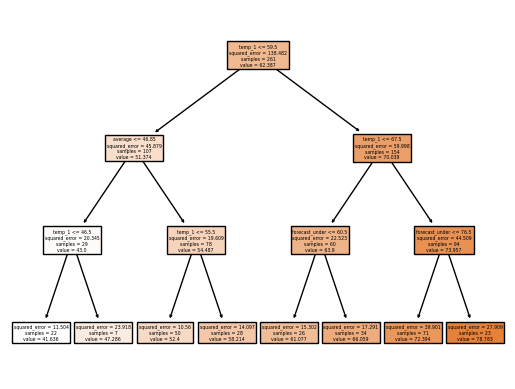

In [125]:

sklearn.tree.plot_tree(dtr,
               feature_names=feature_list,
               class_names="actual",
               filled = True);

### 10. Obten el `feature_importances` de cada variable en el último modelo

feature_importance:
It gets the feature importances from the decision tree regressor model and creates a dataframe mapping the features to their importances, 
sorted by importance in descending order.

* This shows which features were most important for the model's predictions.


In [126]:
dtr.feature_importances_
feature_list

import_dict = {'features': feature_list,
              'importance': dtr.feature_importances_}
pd.DataFrame(import_dict).sort_values('importance', ascending=False)

,features,importance
4,temp_1,0.872637
5,average,0.091943
8,forecast_under,0.035419
10,week_Fri,0.000000
15,week_Tues,0.000000
14,week_Thurs,0.000000
13,week_Sun,0.000000
12,week_Sat,0.000000
11,week_Mon,0.000000
0,year,0.000000
